# Support vector machine

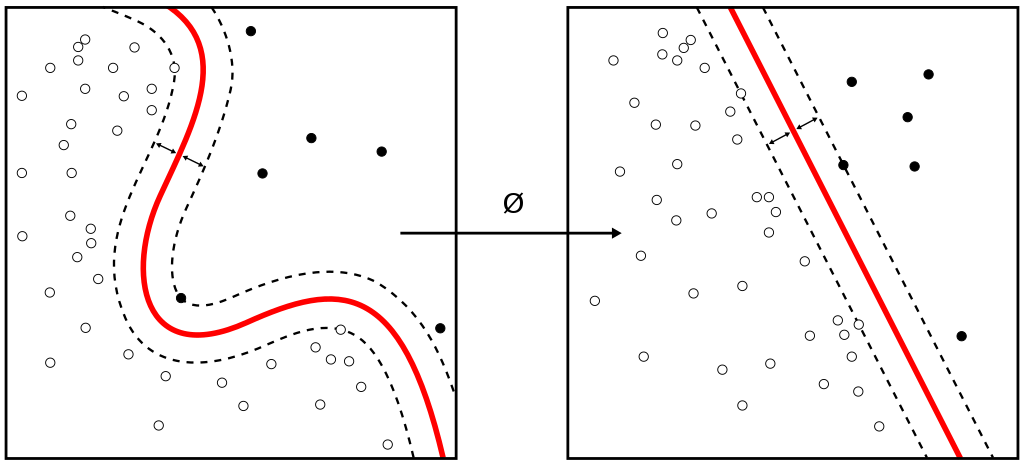

- In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 


- Developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Cortes and Vapnik, 1995, Vapnik et al., 1997) SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory proposed by Vapnik (1982, 1995) and Chervonenkis (1974).



- Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).
- SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. 
- New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.



- In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.



- When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. 


- The support vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data.

### Linear SVM

- We are given a training dataset of n points of the form
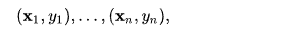

- where the y_i are either 1 or −1, 
- each indicating the class to which the point x_i belongs. 

- Each x_i is a p-dimensional real vector.

- We want to find the "maximum-margin hyperplane" that divides the group of points x_i for which  y_i=1 from the group of points for which y_i=-1, which is defined so that the distance between the hyperplane and the nearest point x_i from either group is maximized.


- Any hyperplane can be written as the set of points  x  satisfying
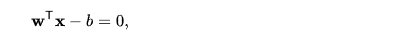



- where  {w}  is the (not necessarily normalized) normal vector to the hyperplane. 
- This is much like Hesse normal form, except that  {w}  is not necessarily a unit vector.

- The parameter b / ||w|| determines the offset of the hyperplane from the origin along the normal vector {w} .

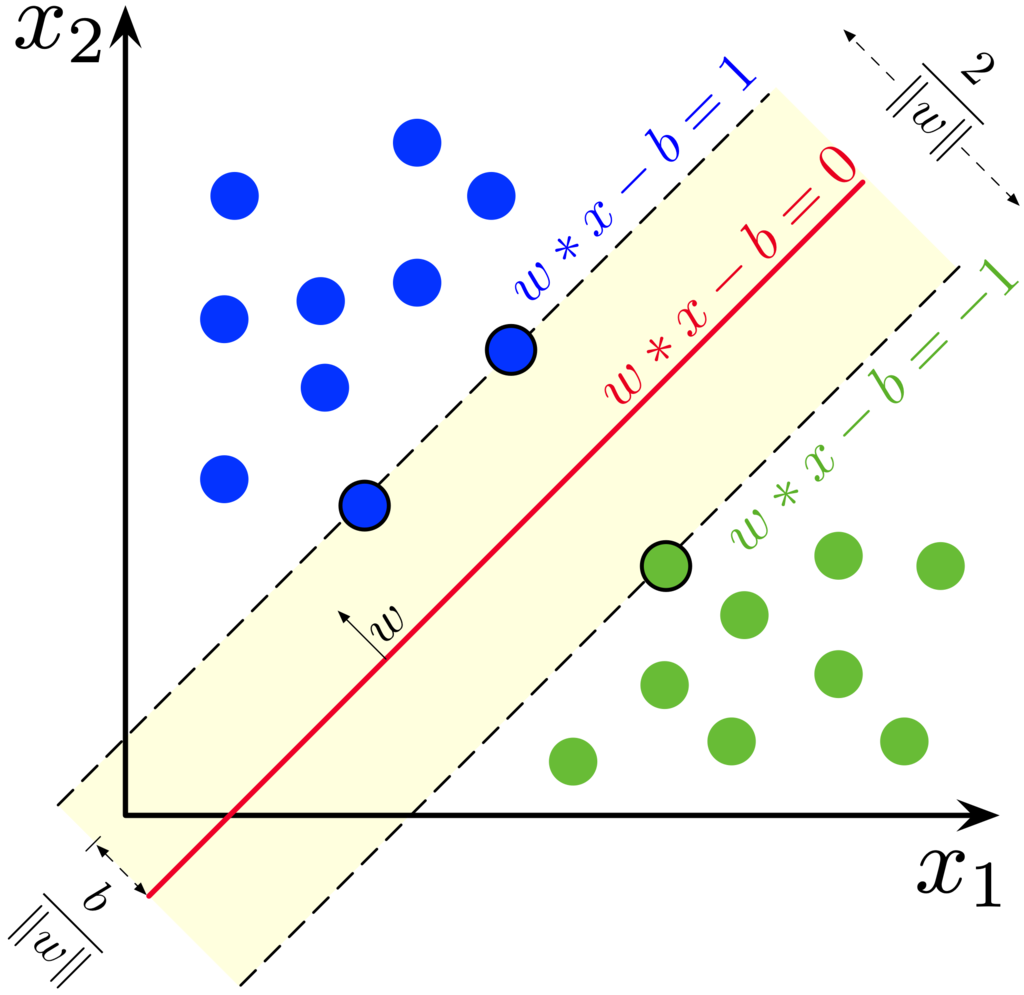


- If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. 
- The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. 
- With a normalized or standardized dataset, these hyperplanes can be described by the equations

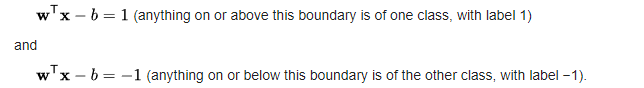

- Geometrically, the distance between these two hyperplanes is 2/(||w||), so to maximize the distance between the planes we want to minimize ||w||.

- The distance is computed using the distance from a point to a plane equation. 
- We also have to prevent data points from falling into the margin, we add the following constraint: 
- for each i either
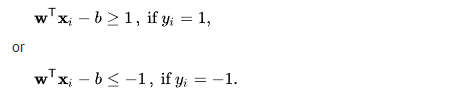

- These constraints state that each data point must lie on the correct side of the margin.
- This can be rewritten as

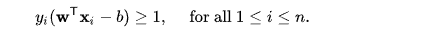

- We can put this together to get the optimization problem:
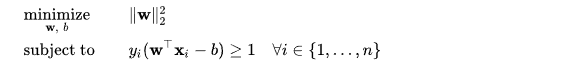


- The w  and b that solve this problem determine our classifier, 

where sgn(.) is the sign function.

- An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those x(i) that lie nearest to it. These x(i) are called support vectors.

## Goal is to Maximise Margin
    - find such a seperator hyper plane that results the largest margin d.
    constraint : such that all the points are correctly classified 
    
    there should not be data points in the margin area between support vector hyperplanes.
    
    
### constraint : all the points are correctly classified

    Let , seperating Hyper plane : 
    
    π : wTx + w0 = 0  (assuming ||w|| = 1 for simplicity )
         
         π+ : wTx + w0 = +1
         π- : wTx + w0 = -1
          
                       2
         margin d =  -----
                     ||w||
                     
                     

    If we generalised the margin d . 
    with different k value ; k is distance between seperating hyperplane to support vectors. 
    
    π : wTx + w0 = 0  (assuming ||w|| = 1 for simplicity )

     π+ : wTx + w0 = +k
     π- : wTx + w0 = -k
                  
                  2*k
     margin d =  -----
                 ||w||

    
    for simplicity lets keep constant k = 1

## Hard-margin



    argmax     2
            ------
      w,w0    ||w||
      
    such that  
     
        wTx(i)+ w0 * y(i) >= 1    (n constraints)          here y {-1,+1}
         
        for all data points 
        i: 1-->n
         
         
      
      

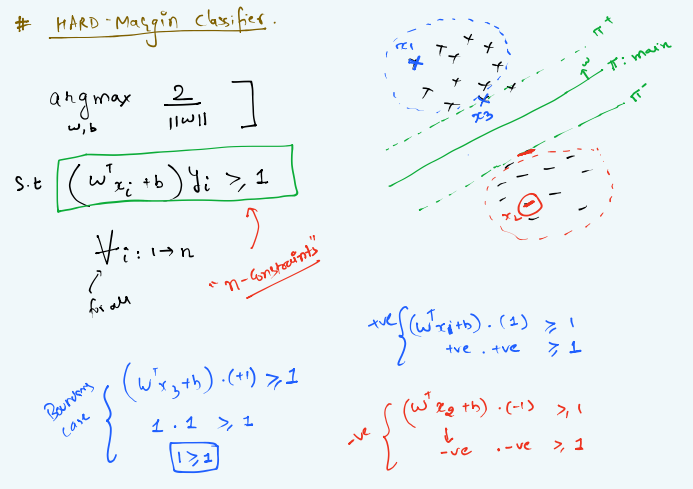

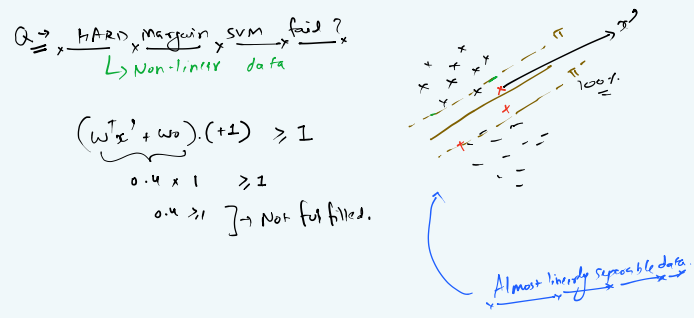

    if any point is with in the marginal area between support vectors , 
    hard margin fails. and 
    cannot follow constraint (wTx(i)+w0)*yi >= 1 
    
    and even one data point is not fullfil the constraint , then entire algorithm fails.

    hard margin fails in case of non-linear seperable data 
                                        (almost linearly seperable data)

#### What we can do with the issue of Hard margin algorithm ?

    how hard we try , there will be such edge points, that will become problem in the marginal area(danger zone)
    

## almost linearly seperable data : (making error zeta)

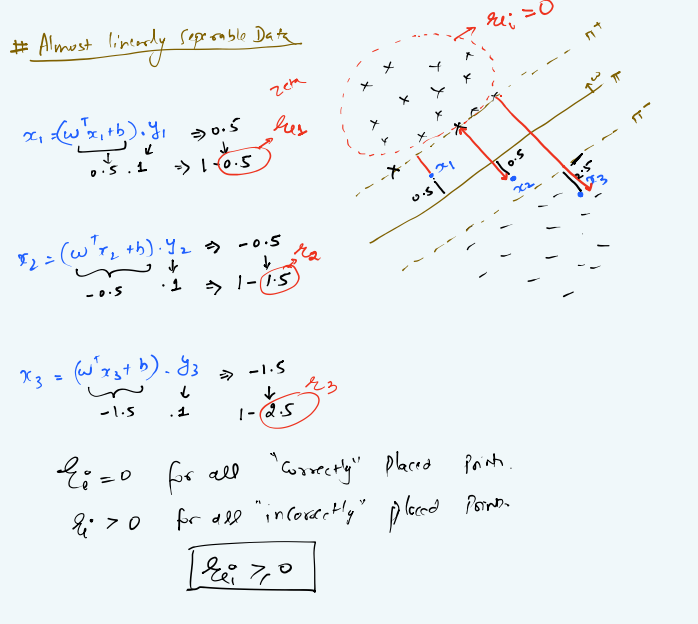

    for the point x1 , which is between π+ and π
    distance between x1 and π+ = 0.5 , y1 = +1
        
         (wTx(1) + w0) * (y1) = 0.5 = 1-0.5      zeta(0) = -0.5
        
        
    for x2 , distnace between x2 and π+ = -0.5 ; y2 = +1
         
         (wTx(2) + w0) * (y2) = -0.5 = 1-1.5      zeta(1) = -1.5
       
     
    for x3 , distnace between x3 and π+ = -1.5 ; y2 = +1
    
         
         (wTx(3) + w0) * (y3) = -1.5 = 1-1.5      zeta(3) = -1.5 
         
                                                 zeta away from the goal .
                                                 
    
    
    x1 is 0.5 units away from where it was suppose to be.
    x2 is 1.5 units away 
    and
    x3 is 2.5 units away from where it was suppose to be. 

    for all the correctly classified points , above  π+ and  π- 
    zeta(i) will be 0.
    
    and for all incorrectly placed points(miss classified and in danger zone)
    zeta(i) will be >= 0.  (a panelty for such points )

## Soft Margin : 

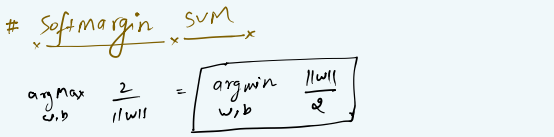

    we typically minimise the loss function :
    
    
    our goal is to maximise the distance between support vectors 
    
    argmax    2
    w,w0   -------- 
            ||w|| 
    
    this we can convert into minimization : 
    
               ||w||
    argmin  -----------
    w,w0         2

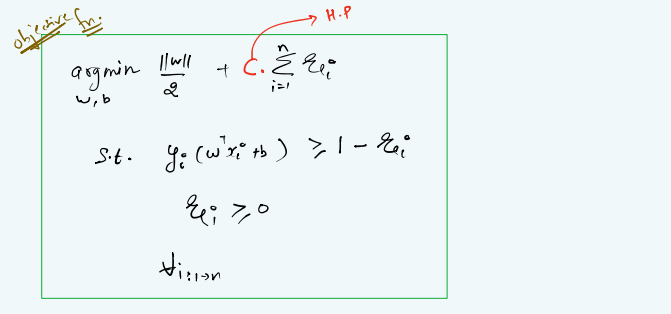

    for every point, we will give some error 
    
                        
    argmin  ||w||     +        n   
    w,w0    -----         C * sum(zeta(i))    
               2              i=1
               
               
              such that y(i)*(wTx(i) + w0) >= 1-zeta(i)
                                       zeta(i) >=0
                               for all the data points .
                               
              C is the hyperparameter to tackle bias variance issue.

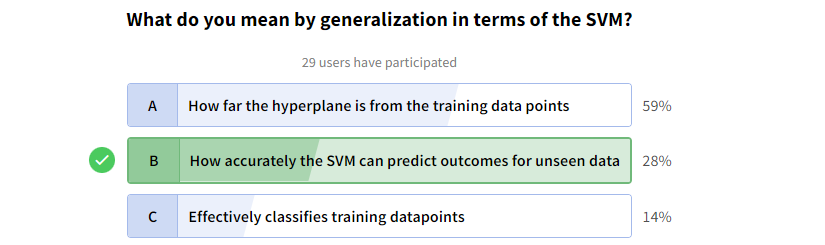
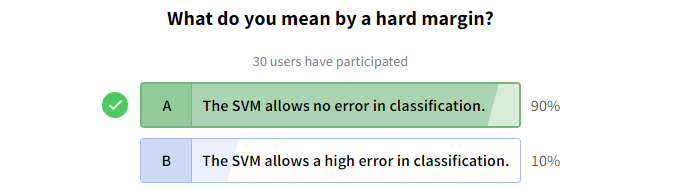

- To extend SVM to cases in which the data are not linearly separable, the hinge loss function is helpful
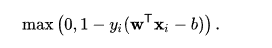

- Note that y{i} is the i-th target (i.e., in this case, 1 or −1), and w^Tx{i}-b is the i-th output.


- This function is zero if the constraint in (1) is satisfied, in other words, if x{i} lies on the correct side of the margin. 
- For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.


- The goal of the optimization then is to minimize
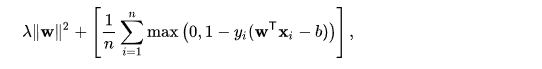

- where the parameter lambda >0 determines the trade-off between increasing the margin size and ensuring that the x{i} lie on the correct side of the margin. By deconstructing the hinge loss, this optimization problem can be massaged into the following:
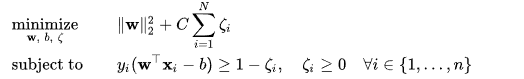


- Thus, for large values of C, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not. (lambda  is inversely related to C)

## Bias variance tradeoff :     

    if C is very large . 
    focus more on errors . 
    more importance given to the loss zeta. 
    allow no errors to be made.
    thus overfitiing case. 
    
    
    if C is very very small value, 
    less focus or no concern with error zeta term . 
    goal will be maximise the margin .
    allow the unlimited errors . 
    thus this is the underfit case. 
    
    Best Value of C : (GS,CV,Hyperparameter tuning)
    

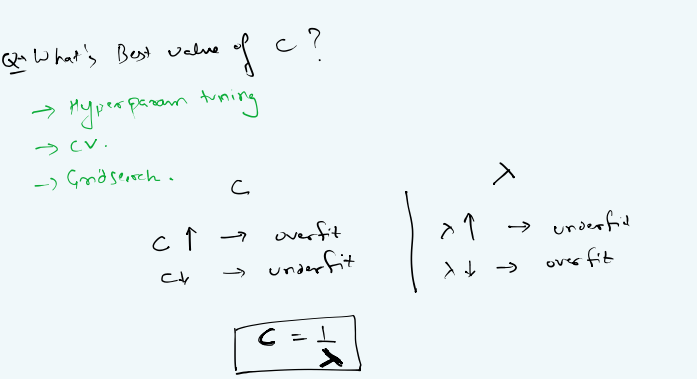

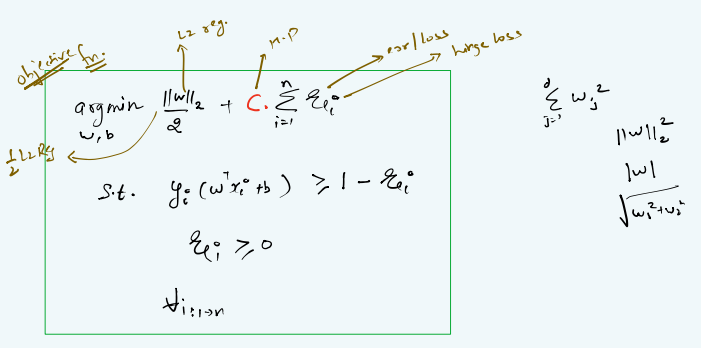

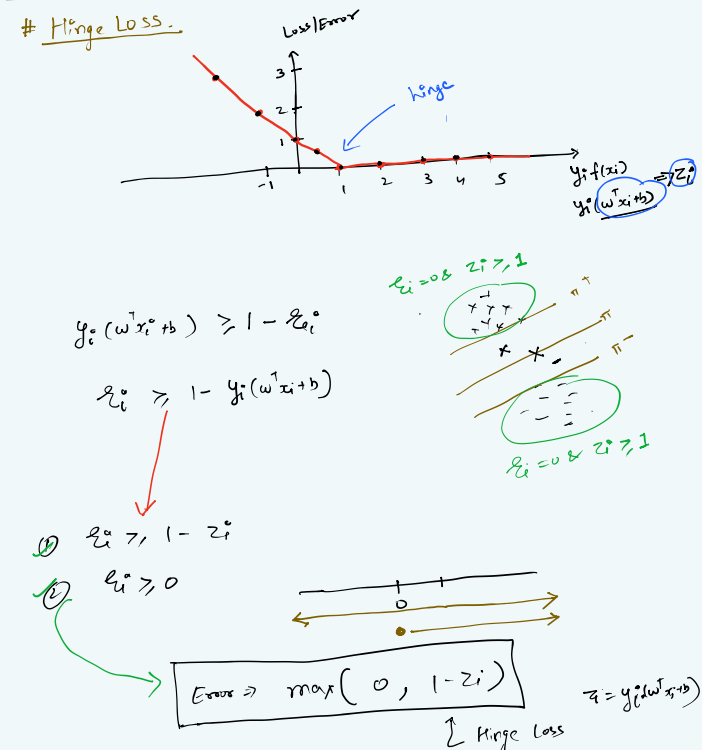

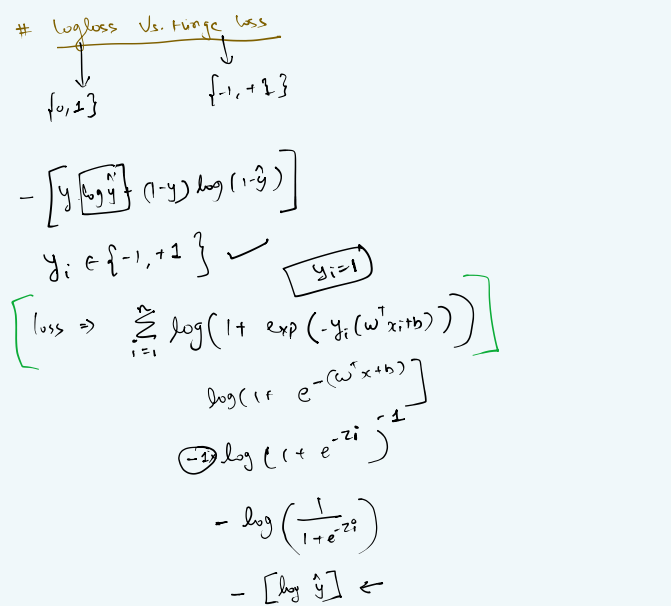

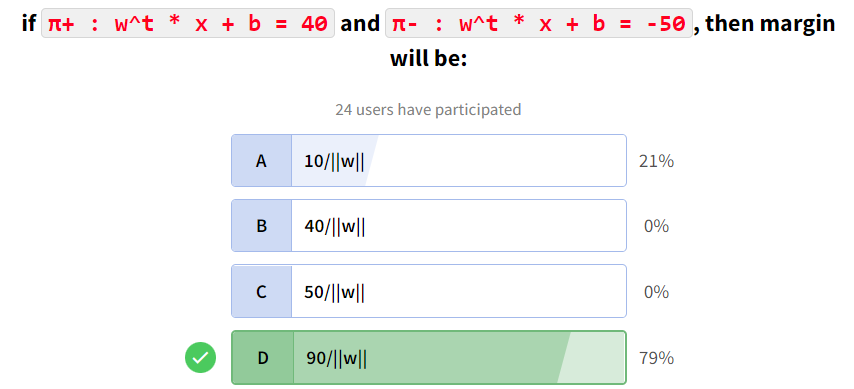

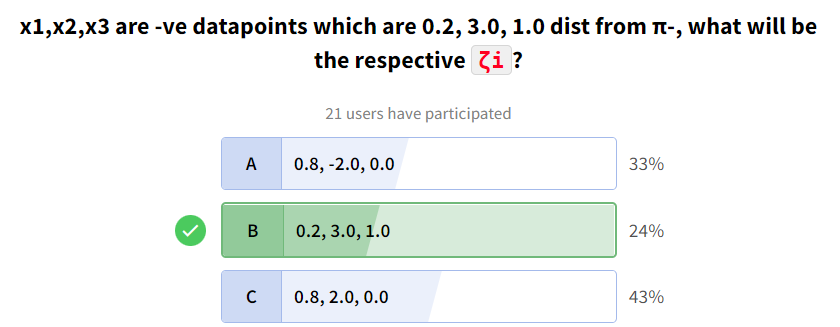